Weronika Sadzik
Procesy stochastyczne 2023/24
Symulacje nr 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 2

Treść zadania: Niech $X$ będzie zmienną losową o rozkładzie wykładniczym z parametrem $\lambda > 0$. Wyznacz $\mathbb{E}(X|X>t)$ dla ustalonego $t>0$.

In [2]:
# tutaj można dowolnie dobrać parametry
t = 5
exp_lambda = 0.01
N = int(1e5)

In [3]:
def conditional_ex_ex2(t, exp_lambda, N, display=True):
    samples = np.random.exponential(1/exp_lambda, N)
    # wysumlowana wartość oczekiwana
    estimated_ex = np.mean(samples[samples > t])
    # realna wartość oczekiwana
    real_ex = t + 1/exp_lambda
    if display:
        print(
            f"Paramaters taken: t = {t}, lambda = {exp_lambda}, N = {N}",
            f"Estimated conditional expectation is {estimated_ex}",
            f"Real conditional expectation is {real_ex}",
            f'Absolute error is {np.abs(real_ex - estimated_ex)}',
            sep='\n'
        )
    return estimated_ex, real_ex

In [4]:
conditional_ex_ex2(t, exp_lambda, N)

Paramaters taken: t = 5, lambda = 0.01, N = 100000
Estimated conditional expectation is 104.76549218954537
Real conditional expectation is 105.0
Absolute error is 0.23450781045463032


(104.76549218954537, 105.0)

Poza klasycznym wysymulowaniem warunkowej wartości oczekiwanej, chciałam również w każdym z tych zadań zobaczyć, jak wygląda zależność błędu bezwględnego między realną WWO, a wysumulowaną od N. W związku z tym na końcu każdego z zadań zamieszone są wykresy log-log błędu od N.

In [5]:
Ns = np.linspace(10, 1e8, 20, dtype=int)
errors = []
for N in Ns:
    estimated_ex, real_ex = conditional_ex_ex2(t, exp_lambda, N, False)
    errors.append(np.abs(estimated_ex - real_ex)) 

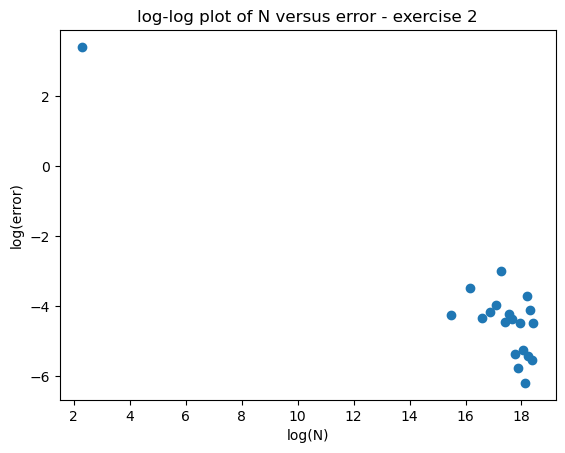

In [6]:
plt.scatter(np.log(Ns), np.log(errors))
plt.title("log-log plot of N versus error - exercise 2")
plt.xlabel("log(N)")
plt.ylabel("log(error)")
plt.show()

## Zadanie 3

Treść zadania: Niech $X$ będzie liczbą orłów otrzymanych przy dwukrotnym rzucie monetą. Wyznacz warunkową wartość oczekiwaną X pod warunkiem, że w pierwszym rzucie wypadł orzeł.

In [7]:
# tutaj można dowolnie dobrać parametry
N = int(1e5)

In [8]:
def conditional_ex_ex3(N, display=True):
    samples1 = np.random.randint(0, 2, N)
    samples2 = np.random.randint(0, 2, N)
    # wysymulowana wartość oczekiwana
    estimated_ex = np.mean((samples1 + samples2)[samples1 == 1])
    # realna wartość oczekiwana
    real_ex = 1.5
    if display:
        print(
            f"Paramater taken: N = {N}",
            f"Estimated conditional expectation is: {estimated_ex}",
            f"Real conditional expectation is: {real_ex}",
            f'Absolute error is {np.abs(real_ex - estimated_ex)}',
            sep='\n'
        )
    return estimated_ex, real_ex

In [9]:
conditional_ex_ex3(N)

Paramater taken: N = 100000
Estimated conditional expectation is: 1.4990076779664414
Real conditional expectation is: 1.5
Absolute error is 0.0009923220335585903


(1.4990076779664414, 1.5)

In [10]:
Ns = np.linspace(10, 1e8, 20, dtype=int)
errors = []
for N in Ns:
    estimated_ex, real_ex = conditional_ex_ex3(N, False)
    errors.append(np.abs(estimated_ex - real_ex))

/var/folders/_5/526nz6wj4mz6zqplxtt3ls680000gn/T/ipykernel_44343/972008250.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(Ns), np.log(errors))


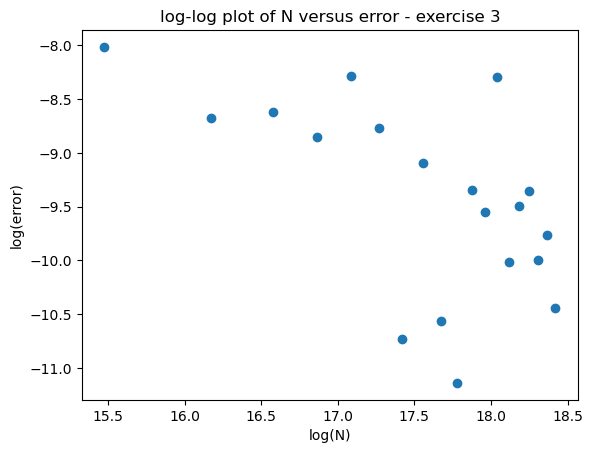

In [11]:
plt.scatter(np.log(Ns), np.log(errors))
plt.title("log-log plot of N versus error - exercise 3")
plt.xlabel("log(N)")
plt.ylabel("log(error)")
plt.show()

## Zadanie 4

Treść zadania: Niech $X$ będzie zmienną losową o rozkładzie Poissona. Wyznacz warunkową wartość oczekiwaną $X$ pod warunkiem, że $X$ jest parzyste.

In [15]:
# tutaj można dowolnie dobrać parametry
lambda_poisson = 3
N = int(1e6)

In [16]:
def conditional_ex_ex4(lambda_poisson, N, display=True):
    samples = np.random.poisson(lambda_poisson, N)
    # wysymulowana wartość oczekiwana
    estimated_ex = np.mean(samples[samples % 2 == 0])
    # realna wartość oczekiwana
    real_ex = lambda_poisson * (1 - np.exp(-2 * lambda_poisson)) / (1 + np.exp(-2 * lambda_poisson))
    if display:
        print(
            f"Paramaters taken: lambda = {lambda_poisson}, N = {N}",
            f"Estimated conditional expectation is: {estimated_ex}",
            f"Real conditional expectation is: {real_ex}",
            f'Absolute error is {np.abs(real_ex - estimated_ex)}',
            sep='\n'
        )
    return estimated_ex, real_ex

In [17]:
conditional_ex_ex4(lambda_poisson, N)

Paramaters taken: lambda = 3, N = 1000000
Estimated conditional expectation is: 2.986065014006662
Real conditional expectation is: 2.9851642610601914
Absolute error is 0.0009007529464706288


(2.986065014006662, 2.9851642610601914)

In [18]:
Ns = np.linspace(10, 1e8, 20, dtype=int)
errors = []
for N in Ns:
    estimated_ex, real_ex = conditional_ex_ex4(lambda_poisson, N, False)
    errors.append(np.abs(estimated_ex - real_ex))

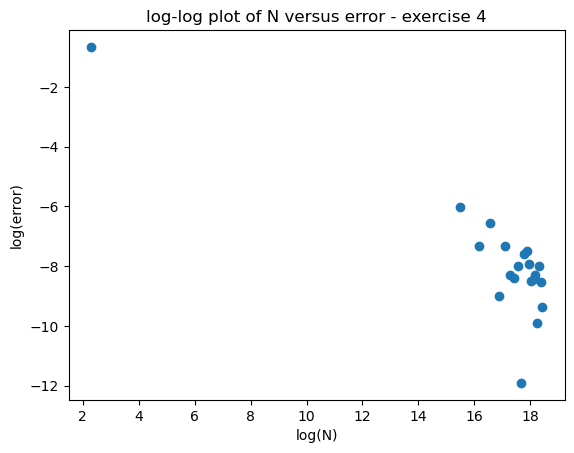

In [19]:
plt.scatter(np.log(Ns), np.log(errors))
plt.title("log-log plot of N versus error - exercise 4")
plt.xlabel("log(N)")
plt.ylabel("log(error)")
plt.show()

## Komentarz do wykresów log-log

Niestety, punkty nie układają się na prostej (więc nawet nie dokładałam linii na wykresie), więc nie obserwujemy zależności potęgowej między błędem, a N. Możliwe, że jest to kwestia arytmetyki fl.